In [44]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
data = pd.read_csv('base reclamações.csv',encoding='windows-1252',sep =';')
# verificação visual das 5 primeiras linhas
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


In [46]:
data.shape

(42307, 8)

In [47]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

In [48]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

In [49]:
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa']

In [50]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

In [51]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

In [52]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)

In [53]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

In [54]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
flynt_consultoria_comercial__eireli                      1
fls_educacional_consultoria_e_assessoria_em_inform       1
flp_comercial_de_medicamentos_ltda_me                    1
florismagno_dos_santos_cerqueira__me                     1
única_brasilia_automoveis_ltda_smaff_ford                1
Length: 10607, dtype: int64


In [55]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

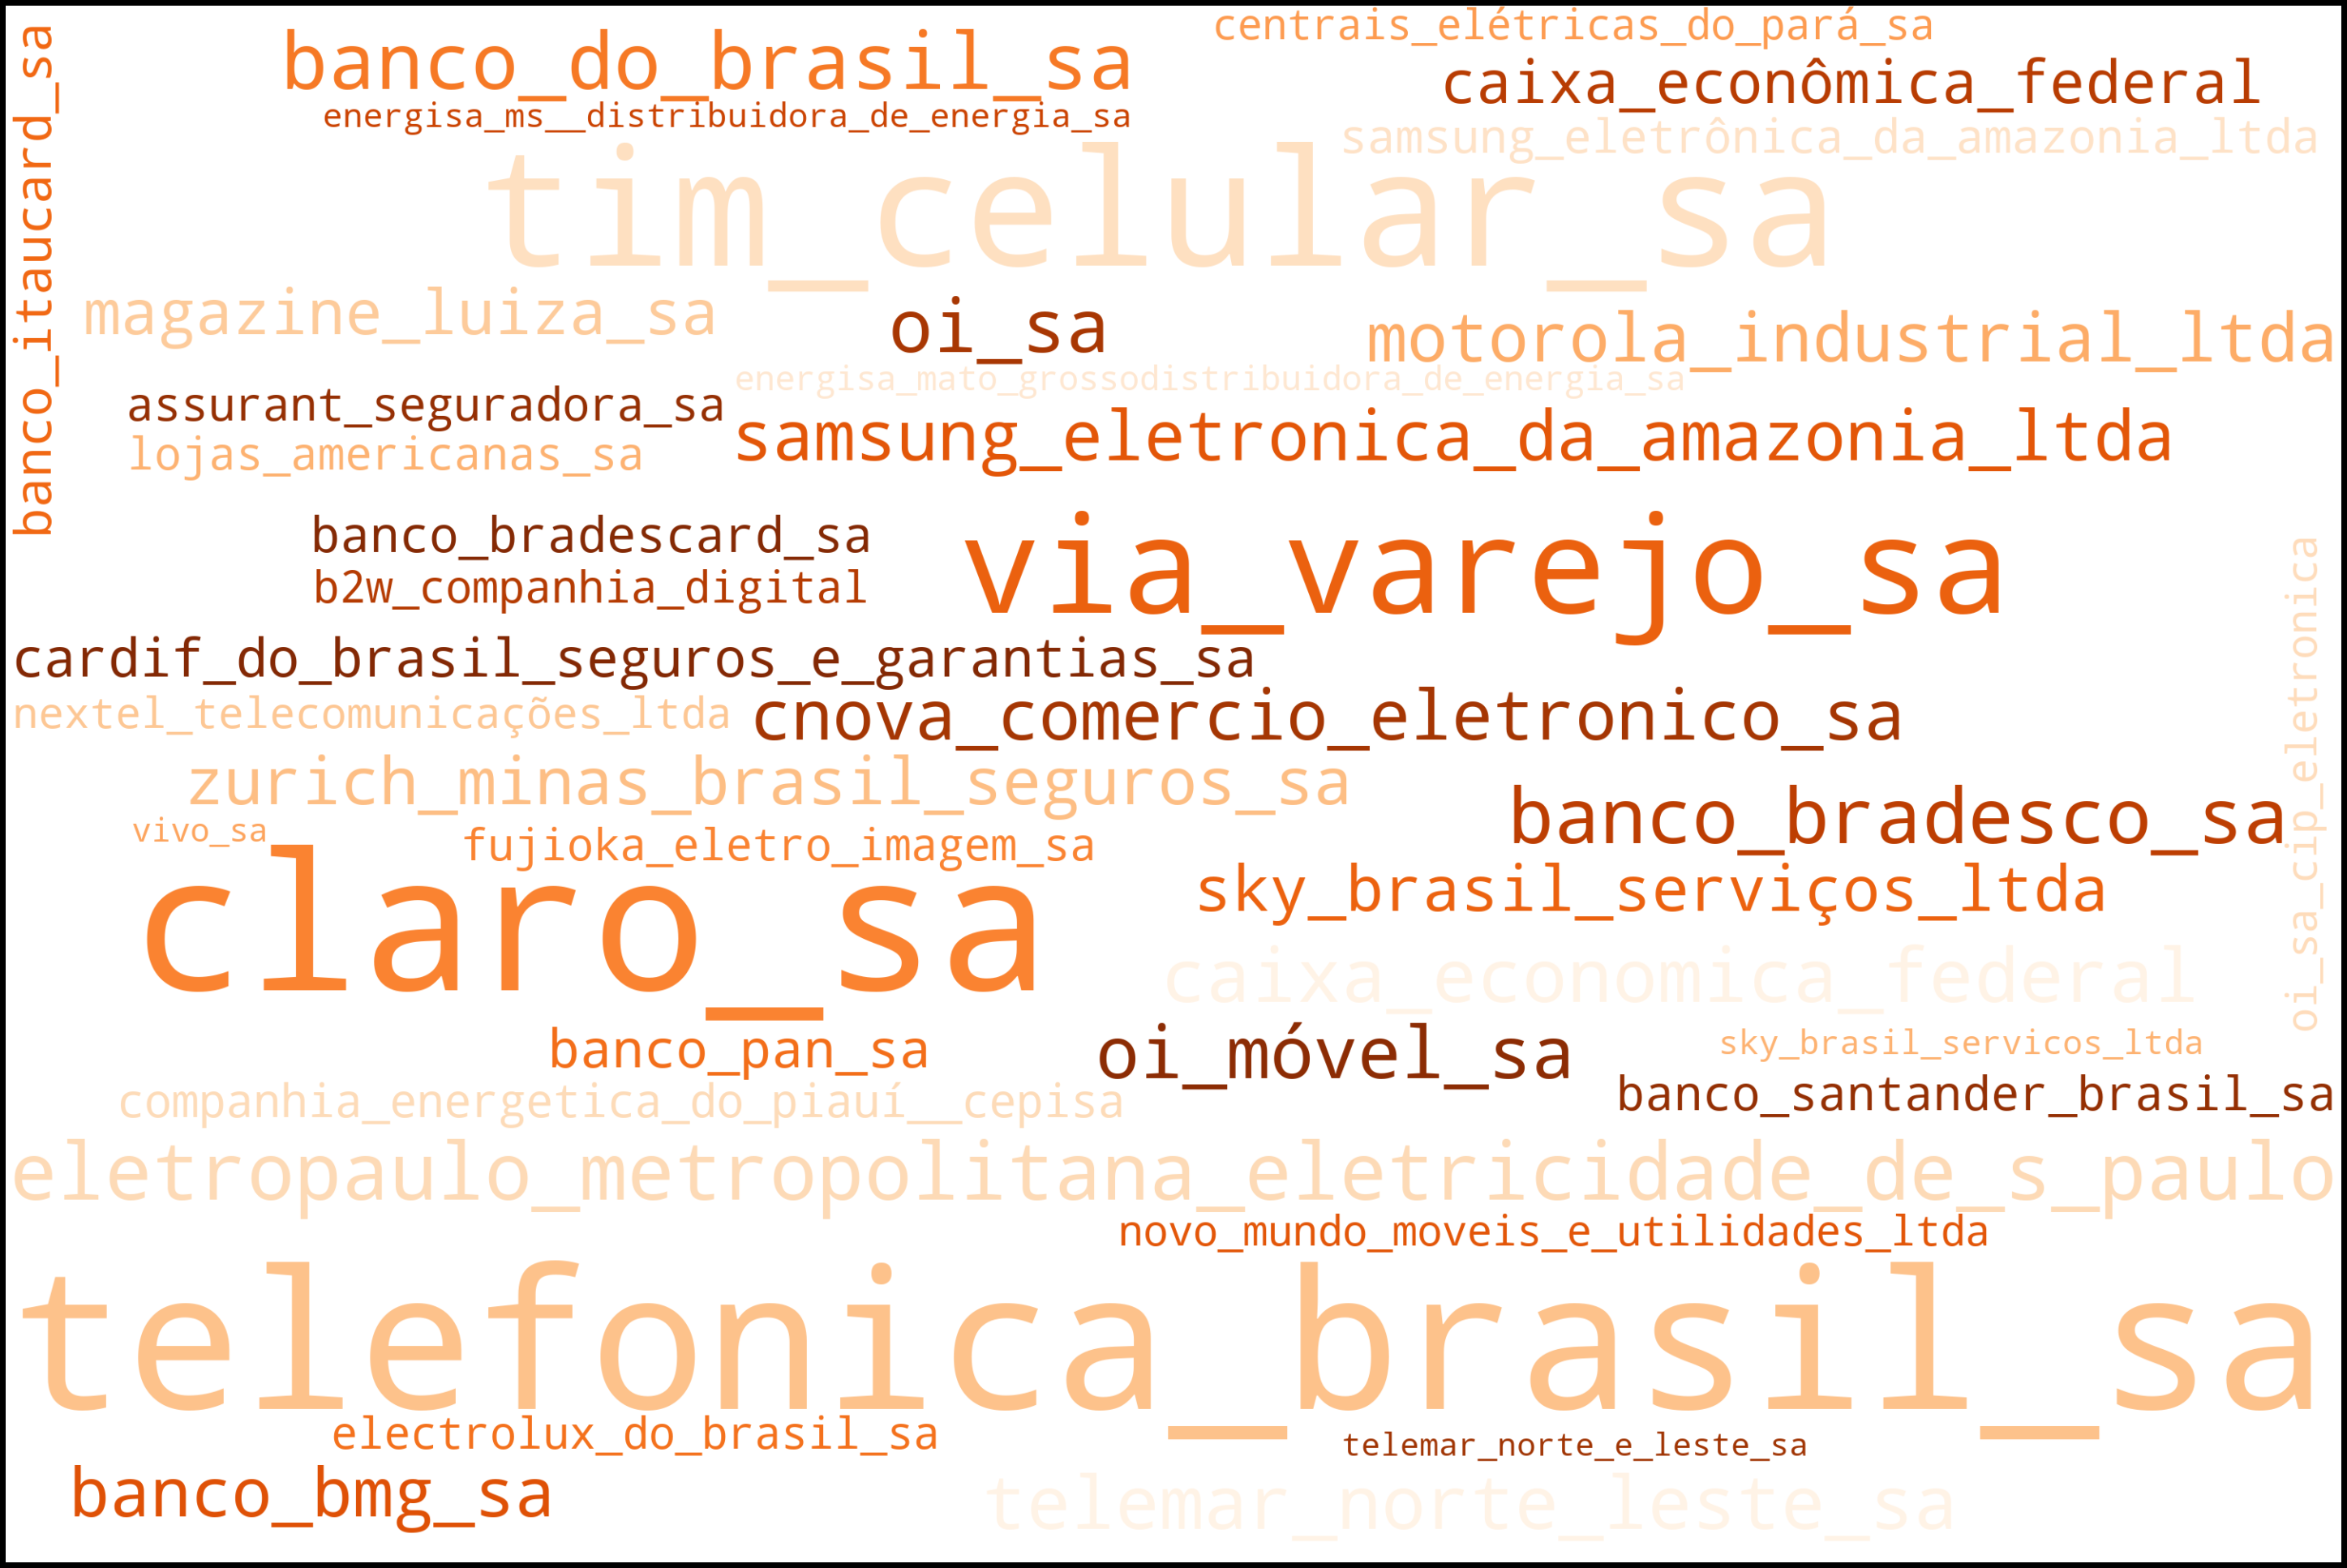

In [56]:
wordcloud_empresas = WordCloud(background_color="white",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()

In [ ]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("cristo.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="red",
                      width=1000, height=1000, max_words=20,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

In [67]:
df_estado = pd.DataFrame()
df_estado['estado'] = data['estado']

In [68]:
df_estado.isnull().sum()

estado    0
dtype: int64

In [70]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_estado["Nome Estado Sem Espaço"] = df_estado.replace({'estado': dicionario},regex=True)

In [71]:
df_estado["Nome Estado Sem Espaço"] = df_estado["Nome Estado Sem Espaço"].str.lower()

In [72]:
print (df_estado.groupby("Nome Estado Sem Espaço").size().sort_values(ascending=False))

Nome Estado Sem Espaço
sp    8127
go    7764
ms    4723
rn    4073
mt    3972
mg    3460
pi    2153
ro    2057
sc    1955
ce    1766
es     828
to     567
pa     341
pb     302
ma     126
rs      90
pe       3
dtype: int64


In [73]:
string_estado = " ".join([text for text in df_estado["Nome Estado Sem Espaço"]])

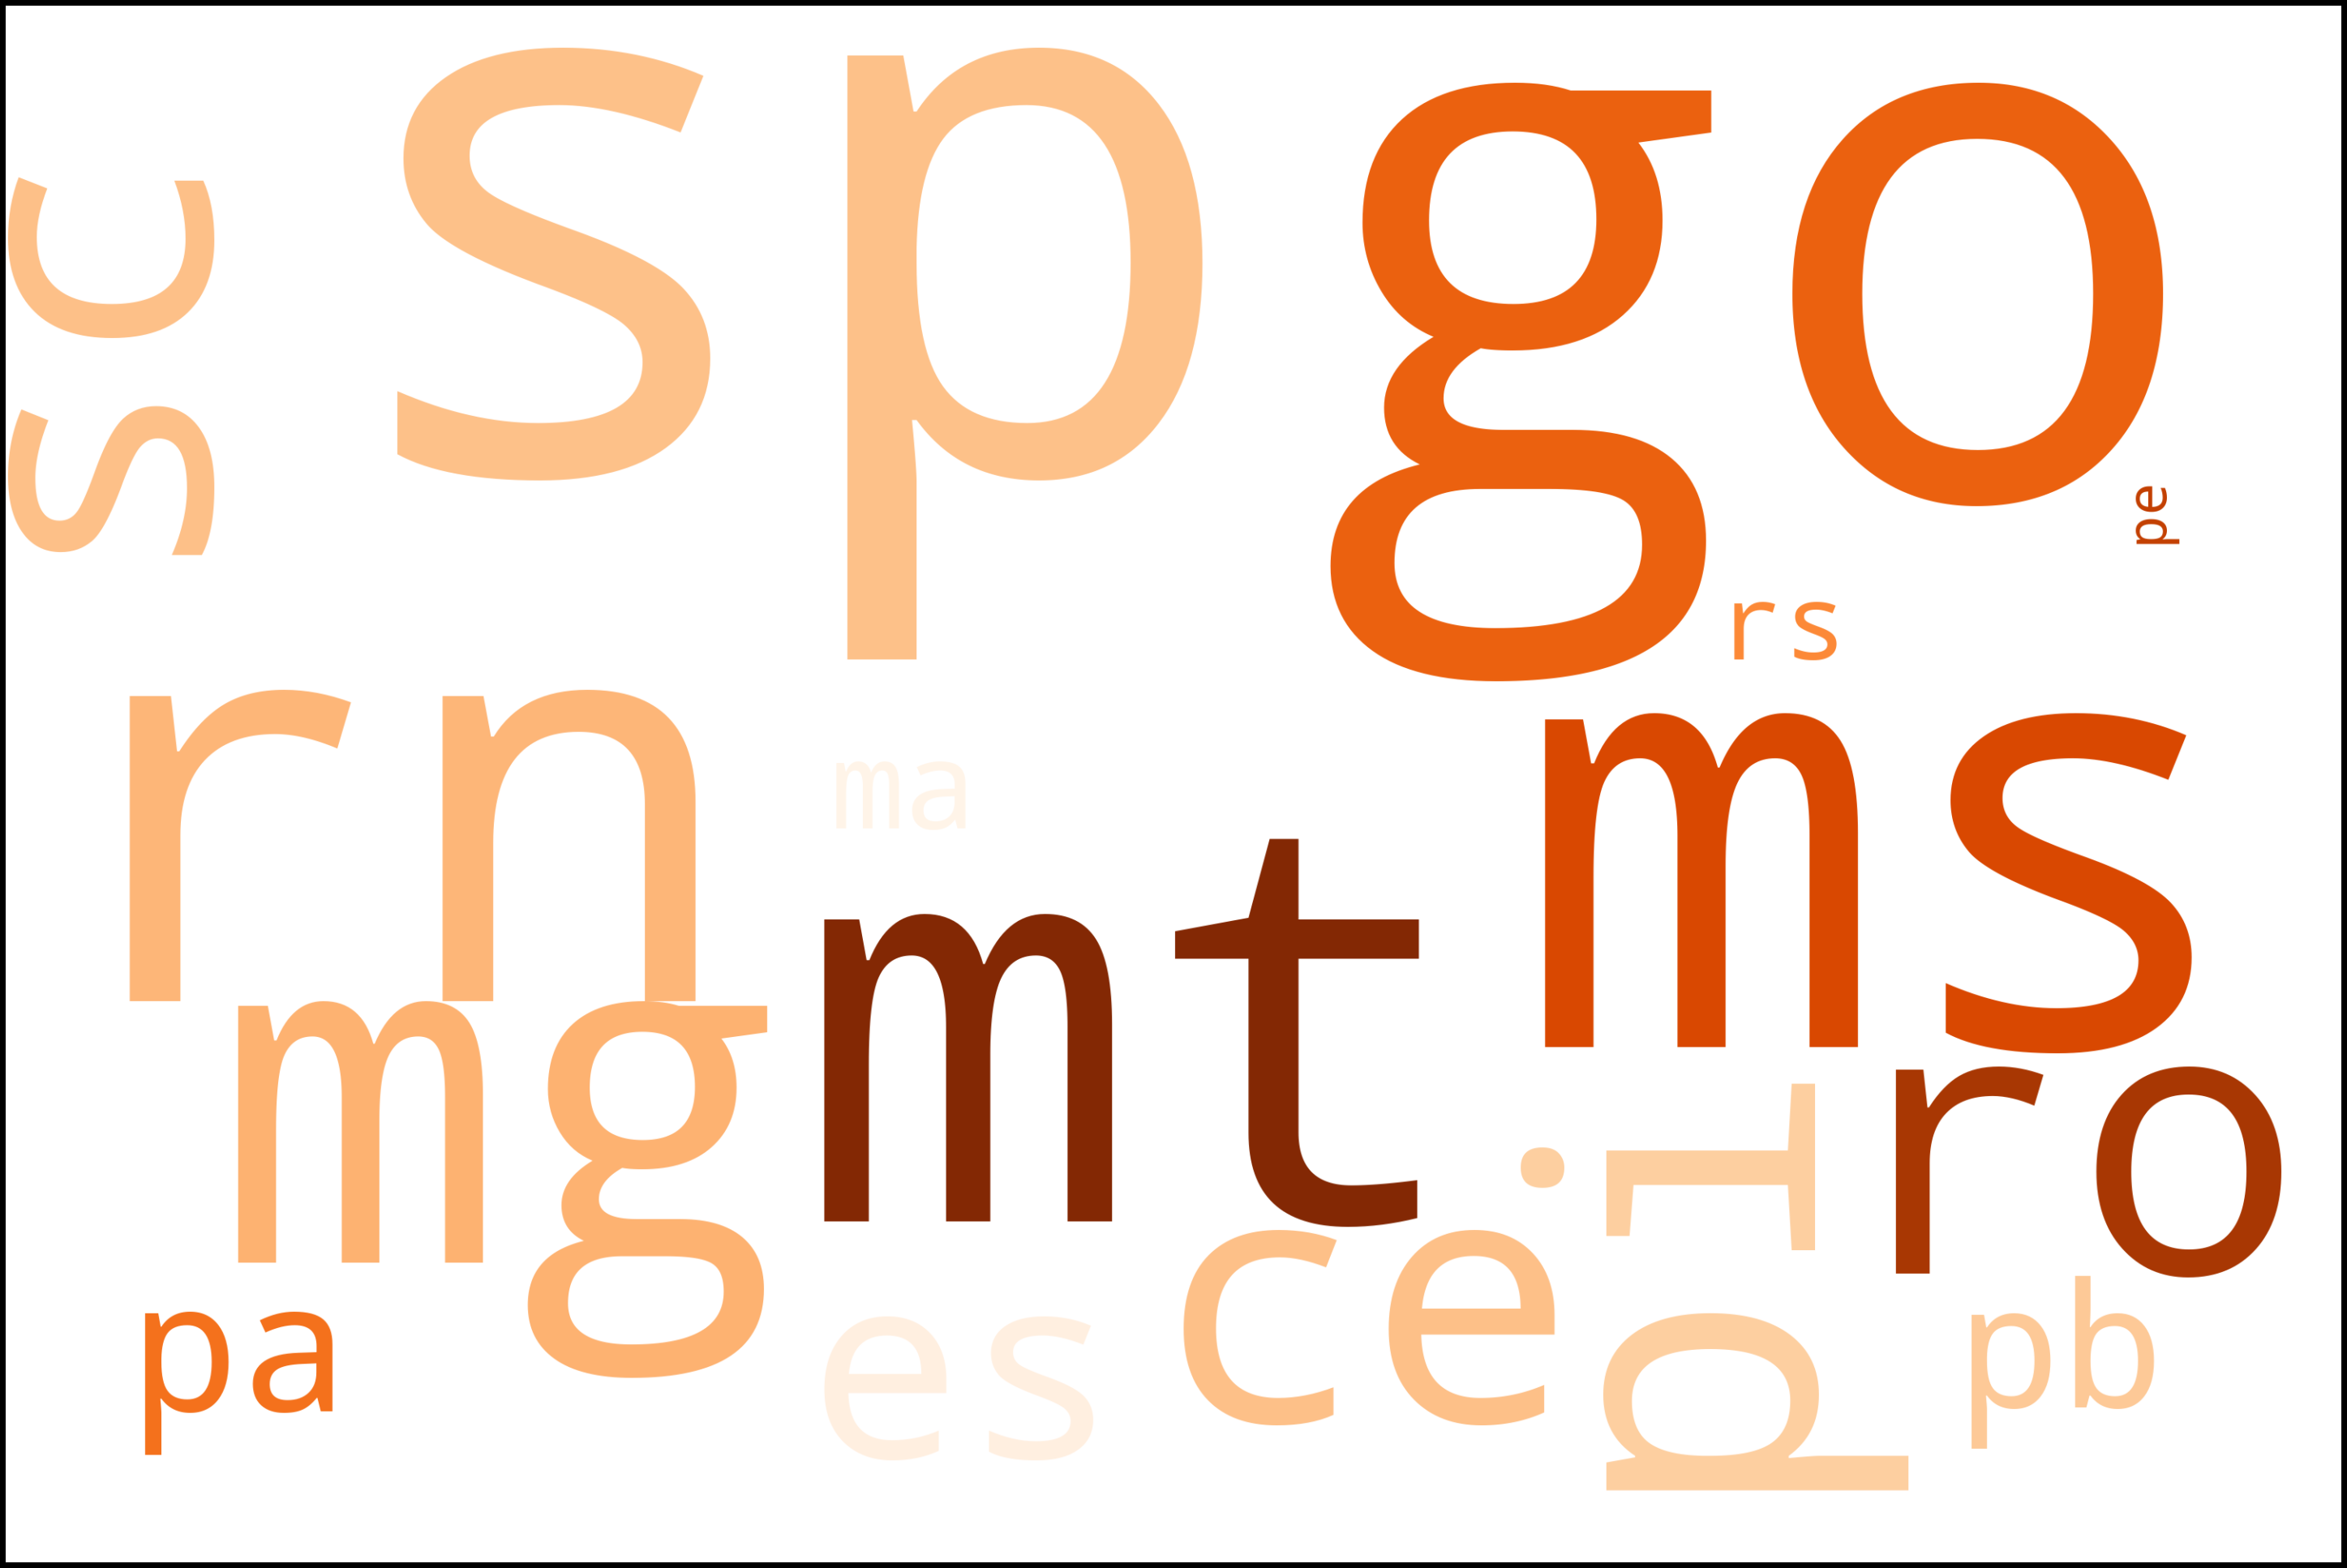

In [76]:
wordcloud_estado = WordCloud(background_color="white",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=100
                             ).generate(string_estado)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_estado, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Estado_wordcloud.png")
plt.show()

In [77]:
df_serviço = pd.DataFrame()
df_serviço['serviço'] = data['serviço']

In [78]:
df_serviço.isnull().sum()

serviço    0
dtype: int64

In [79]:
import re

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
data['serviço'] = data.serviço.map(lower_alpha)

data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,telefonia fixa ( plano de expansão / compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"estacionamento ( particular, supermercado, sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa ( plano de expansão / compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


In [80]:
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
data['serviço'] = data.serviço.map(punc_re)

data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,telefonia fixa plano de expansão compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,"Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


In [81]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

data['tokens'] = data.serviço.map(word_tokenize)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea,tokens
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos,"[outros, contratos]"
1,Sudeste,SP,CLARO S/A,NET,NaN,telefonia fixa plano de expansão compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos,"[telefonia, fixa, plano, de, expansão, compra,..."
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos,"[energia, elétrica]"
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,"Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos,"[estacionamento, particular, supermercado, sho..."
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos,"[telefonia, fixa, plano, de, expansão, compra,..."


In [82]:
word_list = sum(data.tokens.tolist(), [])

word_list[:10]

['outros',
 'contratos',
 'telefonia',
 'fixa',
 'plano',
 'de',
 'expansão',
 'compra',
 'e',
 'venda']

In [83]:
from collections import Counter

word_counts = Counter(word_list)

word_counts = list(zip(word_counts.values(), word_counts.keys()))

word_counts = sorted(word_counts, reverse=True)

word_counts[:40]

[(13736, 'de'),
 (9000, 'etc'),
 (8186, 'celular'),
 (7046, 'e'),
 (5772, 'telefonia'),
 (5149, 'telefone'),
 (5149, 'interfone'),
 (5149, 'convencional'),
 (3518, 'outros'),
 (3101, 'plano'),
 (2992, 'cartão'),
 (2951, 'locação'),
 (2856, 'compra'),
 (2761, 'venda'),
 (2713, 'fixa'),
 (2713, 'expansão'),
 (2548, 'comercial'),
 (2448, 'banco'),
 (2274, 'crédito'),
 (1895, 'elétrica'),
 (1860, 'contratos'),
 (1747, 'energia'),
 (1650, 'para'),
 (1433, 'financeira'),
 (1420, 'informática'),
 (1418, 'produtos'),
 (1142, 'vídeo'),
 (1096, 'loja'),
 (1080, 'móveis'),
 (1079, 'cassete'),
 (1031, 'video'),
 (1031, 'televisão'),
 (1031, 'laser'),
 (1031, 'filmadora'),
 (1018, 'microcomputador'),
 (1011, 'seguro'),
 (920, 'roupa'),
 (911, 'escola'),
 (813, 'artigo'),
 (787, 'água')]

In [84]:
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop'] = data.tokens.apply(stop_lambda)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea,tokens,tokens_stop
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos,"[outros, contratos]","[outros, contratos]"
1,Sudeste,SP,CLARO S/A,NET,NaN,telefonia fixa plano de expansão compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos,"[telefonia, fixa, plano, de, expansão, compra,...","[telefonia, fixa, plano, expansão, compra, ven..."
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos,"[energia, elétrica]","[energia, elétrica]"
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,"Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos,"[estacionamento, particular, supermercado, sho...","[estacionamento, particular, supermercado, sho..."
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos,"[telefonia, fixa, plano, de, expansão, compra,...","[telefonia, fixa, plano, expansão, compra, ven..."


In [85]:
word_list_clean = sum(data.tokens_stop.tolist(), [])

word_list_clean[:10]

['outros',
 'contratos',
 'telefonia',
 'fixa',
 'plano',
 'expansão',
 'compra',
 'venda',
 'locação',
 'energia']

In [86]:
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

word_counts_clean = sorted(word_counts_clean, reverse=True)

word_counts_clean[:10]

[(9000, 'etc'),
 (8186, 'celular'),
 (5772, 'telefonia'),
 (5149, 'telefone'),
 (5149, 'interfone'),
 (5149, 'convencional'),
 (3518, 'outros'),
 (3101, 'plano'),
 (2992, 'cartão'),
 (2951, 'locação')]

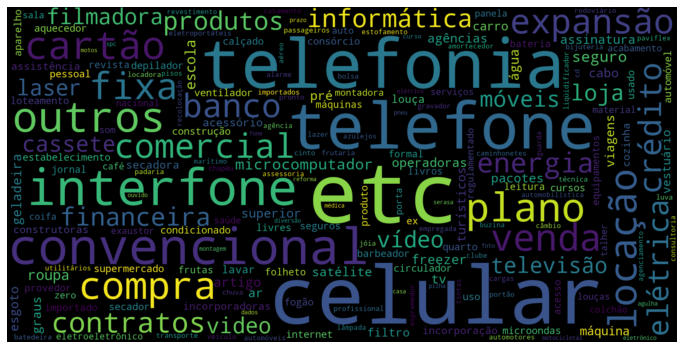

In [87]:
!pip install wordcloud
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()